# Correction du Notebook : Analyse de données cinématographiques
### DataRockstars

Il est important de noter que cette correction n'est pas exhaustive au vu de l'énoncé qui est volontairement flou, afin de vous laisser la liberté d'explorer la base de données à votre guise.

# Installation et imports

In [ ]:
!pip install ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Chargement et compréhension des datasets

Commençons par créer les tables et la base de données à l'aide de SQLAlchemy.

In [ ]:
engine = create_engine('sqlite:///data/database.db')

In [ ]:
csv_files = {
    'actor.csv': 'actor',
    'film.csv': 'film',
    'film_actor.csv': 'film_actor',
    'category.csv': 'category',
    'film_category.csv': 'film_category',
    'country.csv': 'country',
    'city.csv': 'city',
    'address.csv': 'address',
    'customer.csv': 'customer',
    'inventory.csv': 'inventory',
    'language.csv': 'language',
    'payment.csv': 'payment',
    'rental.csv': 'rental',
    'staff.csv': 'staff',
    'store.csv': 'store'
}


for csv_file, table_name in csv_files.items():
    csv_path = f'data/{csv_file}'

    df = pd.read_csv(csv_path)

    df.to_sql(table_name, con=engine, if_exists='replace', index=False)

In [ ]:
%load_ext sql

In [ ]:
%%sql sqlite:///data/database.db

In [ ]:
%sql SELECT name FROM sqlite_master WHERE type='table'

   sqlite://
 * sqlite:///data/database.db
Done.


name
actor
film
film_actor
category
film_category
country
city
address
customer
inventory


Il n'est pas aisé de s'y retrouver avec toutes ces tables. Voici un diagramme qui devrait nous aider à visualiser les liaisons entre les tables.

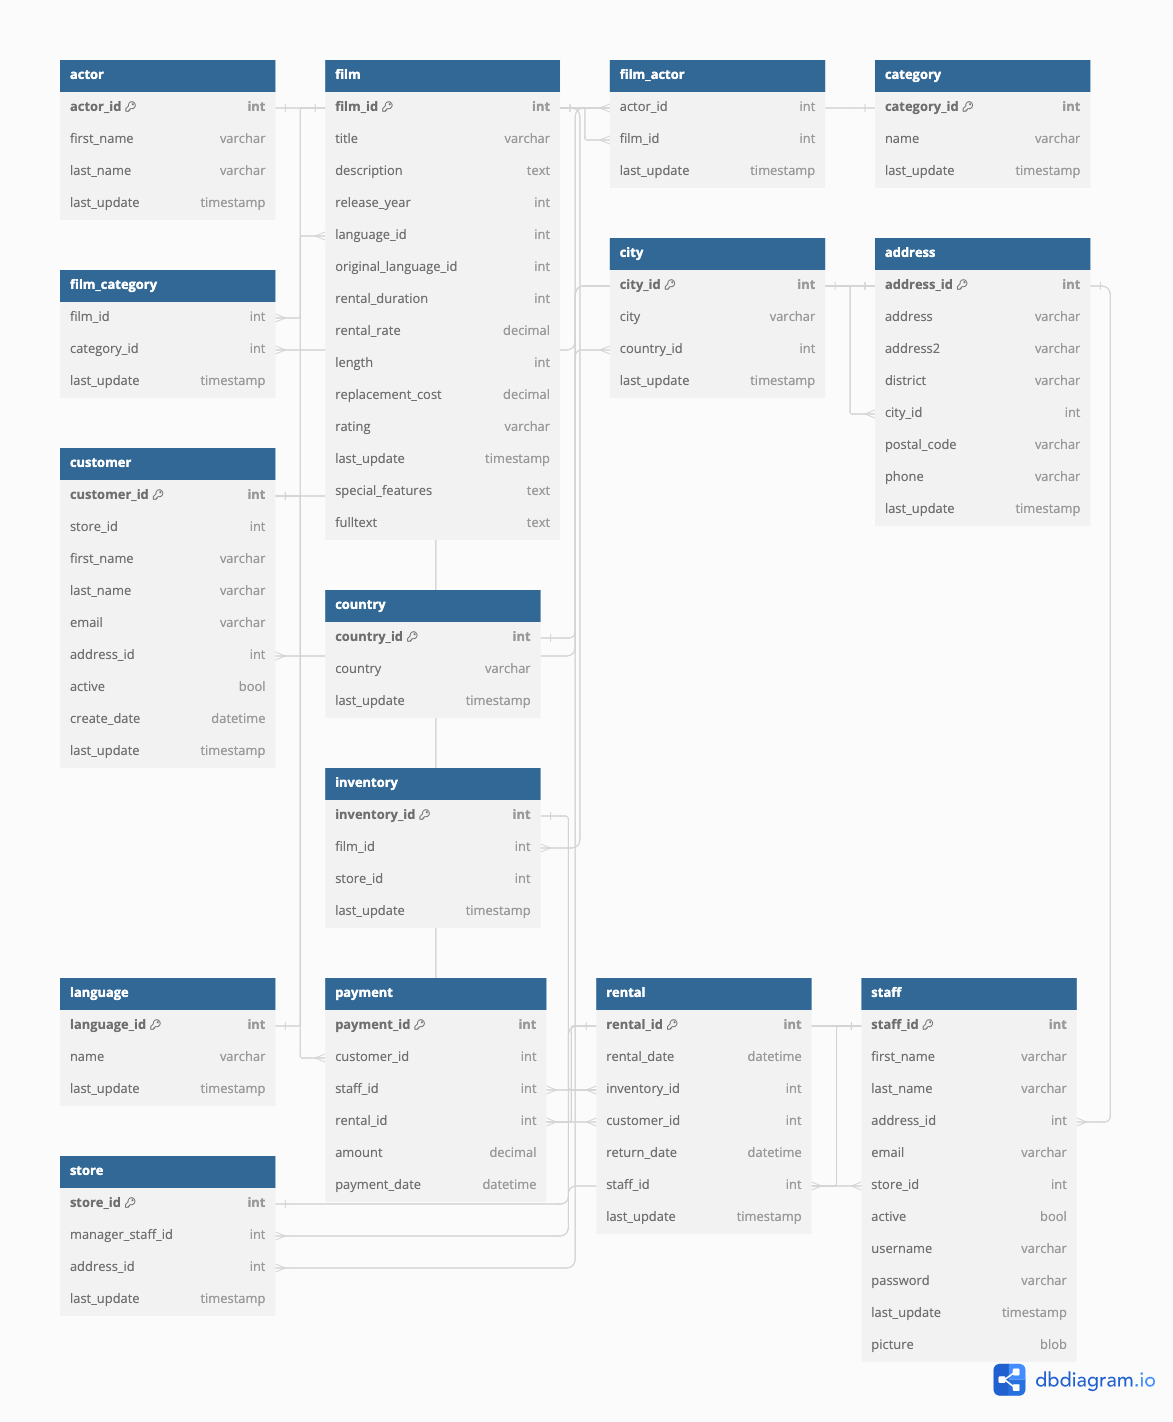

Visualisons quelques lignes pour vérifier que tout s'est bien passé.

In [ ]:
%sql SELECT * FROM film LIMIT 5

   sqlite://
 * sqlite:///data/database.db
Done.


film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies,2006,1,None,6,0.99,86,20.99,PG,2022-09-10 19:46:03.905795+03,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur':2 'drama':5 'epic':4 'feminist':8 'mad':11 'must':14 'rocki':21 'scientist':12 'teacher':17
2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrator And a Explorer who must Find a Car in Ancient China,2006,1,None,3,4.99,48,12.99,G,2022-09-10 19:46:03.905795+03,"{Trailers,""Deleted Scenes""}",'ace':1 'administr':9 'ancient':19 'astound':4 'car':17 'china':20 'databas':8 'epistl':5 'explor':12 'find':15 'goldfing':2 'must':14
3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a Car who must Sink a Lumberjack in A Baloon Factory,2006,1,None,7,2.99,50,18.99,NC-17,2022-09-10 19:46:03.905795+03,"{Trailers,""Deleted Scenes""}","'adapt':1 'astound':4 'baloon':19 'car':11 'factori':20 'hole':2 'lumberjack':8,16 'must':13 'reflect':5 'sink':14"
4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumberjack who must Chase a Monkey in A Shark Tank,2006,1,None,5,2.99,117,26.99,G,2022-09-10 19:46:03.905795+03,"{Commentaries,""Behind the Scenes""}",'affair':1 'chase':14 'documentari':5 'fanci':4 'frisbe':8 'lumberjack':11 'monkey':16 'must':13 'prejudic':2 'shark':19 'tank':20
5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And a Dentist who must Pursue a Forensic Psychologist in The Gulf of Mexico,2006,1,None,6,2.99,130,22.99,G,2022-09-10 19:46:03.905795+03,"{""Deleted Scenes""}",'african':1 'chef':11 'dentist':14 'documentari':7 'egg':2 'fast':5 'fast-pac':4 'forens':19 'gulf':23 'mexico':25 'must':16 'pace':6 'pastri':10 'psychologist':20 'pursu':17


In [ ]:
%sql SELECT * FROM actor LIMIT 5

   sqlite://
 * sqlite:///data/database.db
Done.


actor_id,first_name,last_name,last_update
1,PENELOPE,GUINESS,2022-02-15 12:34:33+03
2,NICK,WAHLBERG,2022-02-15 12:34:33+03
3,ED,CHASE,2022-02-15 12:34:33+03
4,JENNIFER,DAVIS,2022-02-15 12:34:33+03
5,JOHNNY,LOLLOBRIGIDA,2022-02-15 12:34:33+03


# Data Cleaning

In [ ]:
# Consulter les types de colonnes
%%sql

PRAGMA table_info('film');

   sqlite://
 * sqlite:///data/database.db
Done.


cid,name,type,notnull,dflt_value,pk
0,film_id,BIGINT,0,None,0
1,title,TEXT,0,None,0
2,description,TEXT,0,None,0
3,release_year,BIGINT,0,None,0
4,language_id,BIGINT,0,None,0
5,original_language_id,FLOAT,0,None,0
6,rental_duration,BIGINT,0,None,0
7,rental_rate,FLOAT,0,None,0
8,length,BIGINT,0,None,0
9,replacement_cost,FLOAT,0,None,0


In [ ]:
# Vérifier les valeurs NULL

%%sql
SELECT
  COUNT(*) as total,
  COUNT(fulltext) as non_null_values
FROM film;

   sqlite://
 * sqlite:///data/database.db
Done.


total,non_null_values
1000,1000


In [ ]:
# Supprimer les lignes avec des valeurs NULL (à utiliser avec précaution)

%%sql

DELETE FROM film WHERE fulltext IS NULL;

   sqlite://
 * sqlite:///data/database.db
0 rows affected.


[]

In [ ]:
# Mettre à jour par une valeur par défaut

%%sql

UPDATE film SET fulltext = 'PAS DE TEXTE' WHERE fulltext IS NULL;

   sqlite://
 * sqlite:///data/database.db
0 rows affected.


[]

In [ ]:
# Supprimer les doublons

%%sql

DELETE FROM film
WHERE film_id NOT IN (
  SELECT MIN(film_id)
  FROM film
  GROUP BY film_id
);

   sqlite://
 * sqlite:///data/database.db
0 rows affected.


[]

# Analyse de données


Maintenant réalisons des requêtes plus complexes : ci-dessous, les films les plus populaires par genre.

In [ ]:
%%sql

WITH FilmPopularity AS (
  SELECT
    fc.category_id,
    f.film_id,
    f.title,
    c.name AS category_name,
    COUNT(i.inventory_id) AS inventory_count,
    ROW_NUMBER() OVER(PARTITION BY fc.category_id ORDER BY COUNT(i.inventory_id) DESC) as popularity_rank
  FROM film f
  JOIN film_category fc ON f.film_id = fc.film_id
  JOIN category c ON fc.category_id = c.category_id
  JOIN inventory i ON f.film_id = i.film_id
  GROUP BY fc.category_id, f.film_id
)
SELECT
  film_id,
  title,
  category_name,
  inventory_count
FROM FilmPopularity
WHERE popularity_rank = 1;

   sqlite://
 * sqlite:///data/database.db
Done.


film_id,title,category_name,inventory_count
911,TRIP NEWTON,Action,8
880,TELEMARK HEARTBREAKERS,Animation,8
873,SWEETHEARTS SUSPECTS,Children,8
525,LOATHING LEGALLY,Classics,8
1000,ZORRO ARK,Comedy,8
973,WIFE TURN,Documentary,8
897,TORQUE BOUND,Drama,8
753,RUSH GOODFELLAS,Family,8
789,SHOCK CABIN,Foreign,8
835,SPY MILE,Games,8


Cette fois-ci d'une manière plus "conventionnelle" (c'est-à-dire sans le WITH), qui marche tout aussi bien.

In [ ]:
%%sql

SELECT
  fp.film_id,
  fp.title,
  fp.category_name,
  fp.inventory_count
FROM (
  SELECT
    fc.category_id,
    f.film_id,
    f.title,
    c.name AS category_name,
    COUNT(i.inventory_id) AS inventory_count,
    ROW_NUMBER() OVER(PARTITION BY fc.category_id ORDER BY COUNT(i.inventory_id) DESC) as popularity_rank
  FROM film f
  JOIN film_category fc ON f.film_id = fc.film_id
  JOIN category c ON fc.category_id = c.category_id
  JOIN inventory i ON f.film_id = i.film_id
  GROUP BY fc.category_id, f.film_id
) AS fp
WHERE fp.popularity_rank = 1;

   sqlite://
 * sqlite:///data/database.db
Done.


film_id,title,category_name,inventory_count
911,TRIP NEWTON,Action,8
880,TELEMARK HEARTBREAKERS,Animation,8
873,SWEETHEARTS SUSPECTS,Children,8
525,LOATHING LEGALLY,Classics,8
1000,ZORRO ARK,Comedy,8
973,WIFE TURN,Documentary,8
897,TORQUE BOUND,Drama,8
753,RUSH GOODFELLAS,Family,8
789,SHOCK CABIN,Foreign,8
835,SPY MILE,Games,8


Établissons maintenant le profil des clients.

In [ ]:
%%sql

SELECT
  co.country,
  ci.city,
  COUNT(cu.customer_id) AS number_of_customers
FROM customer cu
JOIN address a ON cu.address_id = a.address_id
JOIN city ci ON a.city_id = ci.city_id
JOIN country co ON ci.country_id = co.country_id
GROUP BY co.country
ORDER BY number_of_customers DESC;


   sqlite://
 * sqlite:///data/database.db
Done.


country,city,number_of_customers
India,Yamuna Nagar,60
China,Nanyang,53
United States,San Bernardino,36
Japan,Sasebo,31
Mexico,Atlixco,30
Russian Federation,Elista,28
Brazil,Vila Velha,28
Philippines,Davao,20
Turkey,Osmaniye,15
Indonesia,Pemalang,14


In [ ]:
%%sql

SELECT
  cat.name AS category_name,
  COUNT(rent.rental_id) AS number_of_rentals
FROM rental rent
JOIN inventory inv ON rent.inventory_id = inv.inventory_id
JOIN film f ON inv.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category cat ON fc.category_id = cat.category_id
GROUP BY cat.name
ORDER BY number_of_rentals DESC;

   sqlite://
 * sqlite:///data/database.db
Done.


category_name,number_of_rentals
Sports,1179
Animation,1166
Action,1112
Sci-Fi,1101
Family,1096
Drama,1060
Documentary,1050
Foreign,1033
Games,969
Children,945


A priori, les clients de Sakila (dont est issue la base de données) sont majoritairement indiens et leur genre de films favori est "Sports". Il est possible de connaître plein d'autres choses concernant le profil de clients étudiés.

Mais voyons maintenant ce qu'il en est de leurs achats.

In [ ]:
%%sql

SELECT
  AVG(total_spent) AS average_spent_per_client
FROM (
  SELECT
    SUM(payment.amount) AS total_spent
  FROM payment
  GROUP BY payment.customer_id
) AS customer_spending;

   sqlite://
 * sqlite:///data/database.db
Done.


average_spent_per_client
112.54843071786303


In [ ]:
%%sql

SELECT
  AVG(number_of_rentals) AS average_rentals_per_client
FROM (
  SELECT
    COUNT(rental.rental_id) AS number_of_rentals
  FROM rental
  GROUP BY rental.customer_id
) AS customer_rentals;

   sqlite://
 * sqlite:///data/database.db
Done.


average_rentals_per_client
26.784641068447414


On remarque que les clients ont loué en moyenne 26 films pour un montant total moyen de 112 livres environ. S'il est utile à l'entreprise de connaître les données précises par client, on peut utiliser les approches suivantes.

In [ ]:
%%sql

SELECT
  cu.customer_id,
  cu.first_name || ' ' || cu.last_name AS customer_name,
  SUM(pa.amount) AS total_spent
FROM customer cu
JOIN payment pa ON cu.customer_id = pa.customer_id
GROUP BY cu.customer_id
ORDER BY total_spent DESC;

   sqlite://
 * sqlite:///data/database.db
Done.


customer_id,customer_name,total_spent
526,KARL SEAL,221.55000000000007
148,ELEANOR HUNT,216.54000000000005
144,CLARA SHAW,195.58000000000004
178,MARION SNYDER,194.61000000000004
137,RHONDA KENNEDY,194.61000000000004
459,TOMMY COLLAZO,186.62000000000003
469,WESLEY BULL,177.60000000000002
468,TIM CARY,175.61
236,MARCIA DEAN,175.58
181,ANA BRADLEY,174.66000000000003


In [ ]:
%%sql

SELECT
  cu.customer_id,
  cu.first_name || ' ' || cu.last_name AS customer_name,
  COUNT(rent.rental_id) AS number_of_rentals
FROM customer cu
JOIN rental rent ON cu.customer_id = rent.customer_id
GROUP BY cu.customer_id
ORDER BY number_of_rentals DESC;

   sqlite://
 * sqlite:///data/database.db
Done.


customer_id,customer_name,number_of_rentals
148,ELEANOR HUNT,46
526,KARL SEAL,45
236,MARCIA DEAN,42
144,CLARA SHAW,42
75,TAMMY SANDERS,41
469,WESLEY BULL,40
197,SUE PETERS,40
468,TIM CARY,39
178,MARION SNYDER,39
137,RHONDA KENNEDY,39


Et qu'en est-il des ventes des magasins de locations ?

In [ ]:
%%sql

SELECT
  s.store_id,
  COUNT(p.payment_id) AS number_of_transactions,
  ROUND(SUM(p.amount), 2) AS total_revenue,
  ROUND(AVG(p.amount), 2) AS average_revenue_per_rental
FROM store s
JOIN staff sta ON s.store_id = sta.store_id
JOIN payment p ON sta.staff_id = p.staff_id
GROUP BY s.store_id
ORDER BY total_revenue DESC;

   sqlite://
 * sqlite:///data/database.db
Done.


store_id,number_of_transactions,total_revenue,average_revenue_per_rental
2,7992,33927.04,4.25
1,8057,33489.47,4.16


Deux magasins sont référencés dans la base de données : pour ces deux-ci, environ 8000 locations ont été réalisées, pour environ 34000 livres de revenus (ce qui représente donc 4 euros environ par transaction).

Vous commencez peut-être à percevoir l'ampleur des possibilités offertes par l'exploration et l'analyse de cette base de données. Tout ceci est rendu possible par une architecture de base de données bien pensée, et des requêtes subtiles munies de jointures et agrégations.

Ce qui a été fait précédemment n'est qu'une analyse de surface, mais suivant le client et son besoin, cette analyse diffèrera et devra être davantage approfondie.